In [ ]:
import numpy as np 
import pandas as pd 


In [ ]:
import pandas as pd

In [ ]:
import re
def clean_text(text):
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    text = re.sub(r"[^a-zA-z.!?'0-9]", ' ', text)
    text = re.sub('\t', ' ',  text)
    text = re.sub(r" +", ' ', text)
    return text

In [ ]:
data = pd.read_csv('imdb_reviews.csv')

In [ ]:
X = data['Reviews']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.Reviews,data.Sentiment, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.16, random_state=1) # 0.25 x 0.8 = 0.2


print('Number of reviews in the total set : {}'.format(len(X)))
print('Number of reviews in the training set : {}'.format(len(X_train)))
print('Number of reviews in the validation set : {}'.format(len(X_val)))
print('Number of reviews in the testing set : {}'.format(len(X_test)))

Number of reviews in the total set : 4025
Number of reviews in the training set : 2704
Number of reviews in the validation set : 516
Number of reviews in the testing set : 805


In [ ]:
!pip install tensorflow_hub tensorflow_text tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 21.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.7 MB/s eta 0:00:00
  C

In [ ]:
import os
import numpy as np 
import pandas as pd 
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
labeling = {
    'positive': 1, 
    'negative': 0,
    'default': -1  # or any other numerical value you want to use as a default label
}

data['Sentiment'] = data['Sentiment'].fillna('default')
data['Sentiment'] = data['Sentiment'].apply(lambda x: labeling[x])
# Output first ten rows
data.head(10)

,Reviews,Sentiment
0,<START this film was just brilliant casting lo...,1
1,<START bad music and a giant safety pin these...,0
2,<START this has to be one of the worst films o...,0
3,<START the <UNK> <UNK> at storytelling the tra...,1
4,<START worst mistake of my life br br i picked...,0
5,<START begins better than it ends funny that t...,0
6,<START lavish production values and solid perf...,1
7,<START the <UNK> tells the story of the four h...,0
8,<START just got out and cannot believe what a ...,1
9,<START this movie has many problem associated ...,0


<Axes: xlabel='Sentiment'>

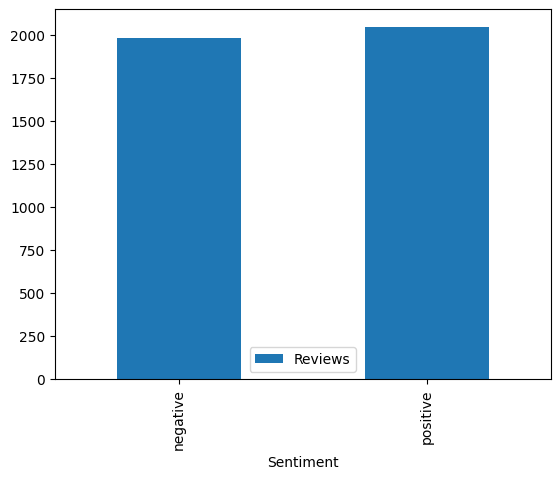

In [ ]:
data.groupby('Sentiment').count().plot(kind='bar')

<Axes: >

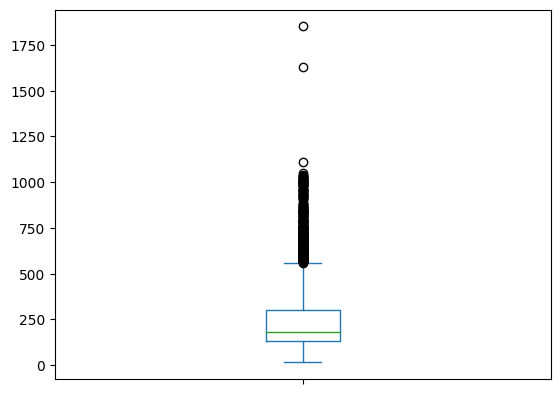

In [ ]:
# Calculate review lengths
review_len = pd.Series([len(review.split()) for review in data['Reviews']])

# The distribution of review text lengths
review_len.plot(kind='box')

<AxesSubplot:ylabel='Count'>

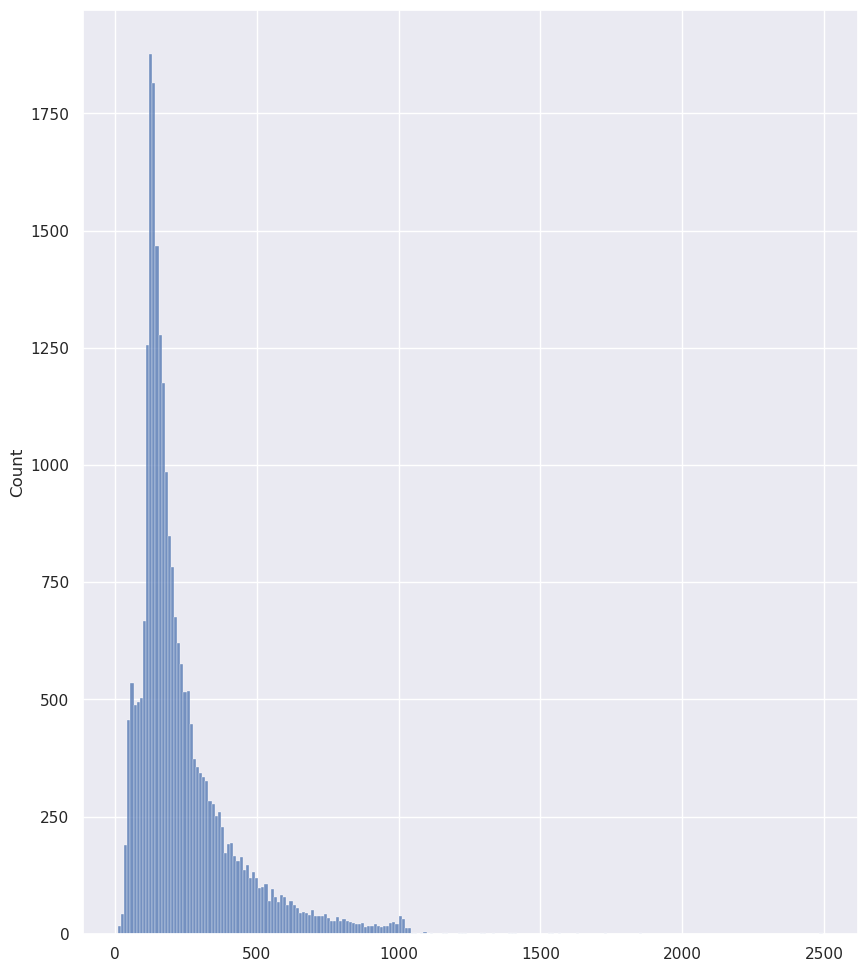

In [ ]:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)

plt.figure(figsize = (10,12))
sns.histplot(review_len)

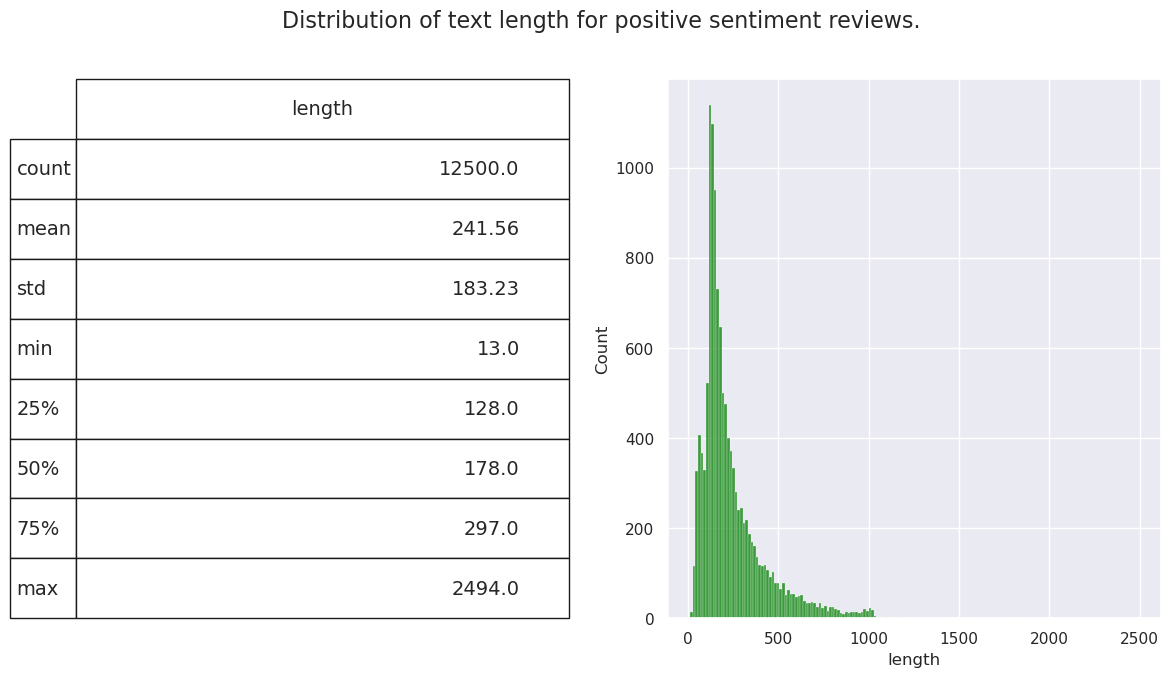

In [ ]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.Reviews.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']==1]['length'], ax=ax1,color='green')
describe = data.length[data.Sentiment==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment reviews.', fontsize=16)

plt.show()

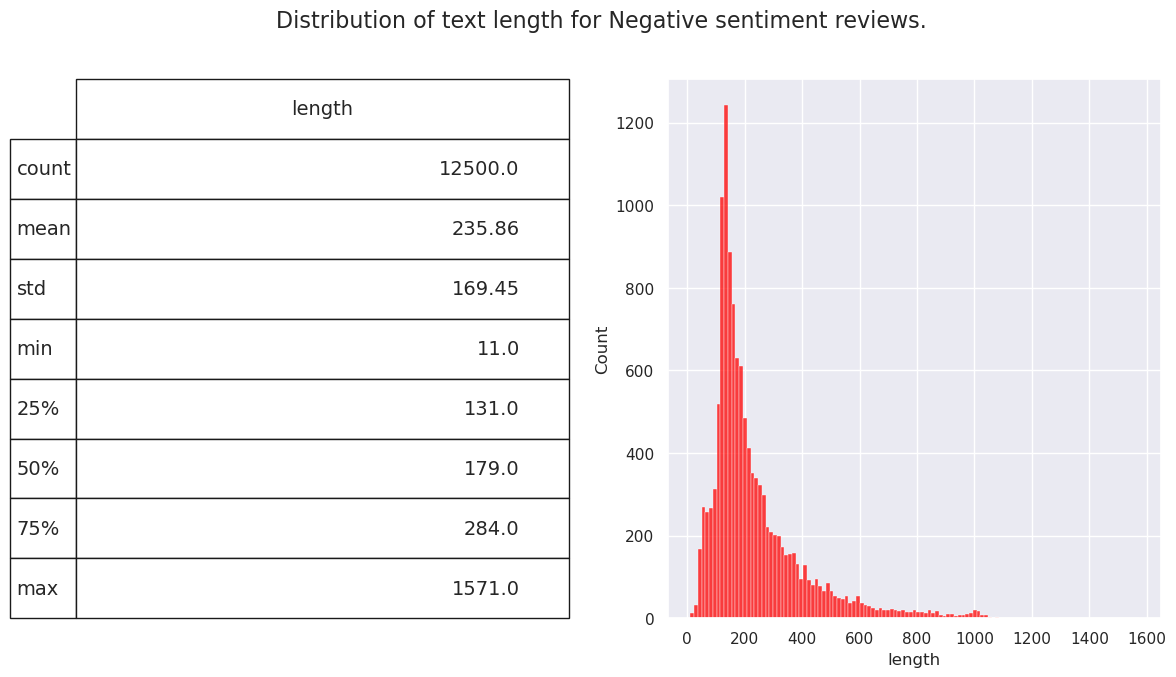

In [ ]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Sentiment']==0]['length'], ax=ax1,color='red')
describe = data.length[data.Sentiment==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment reviews.', fontsize=16)

plt.show()

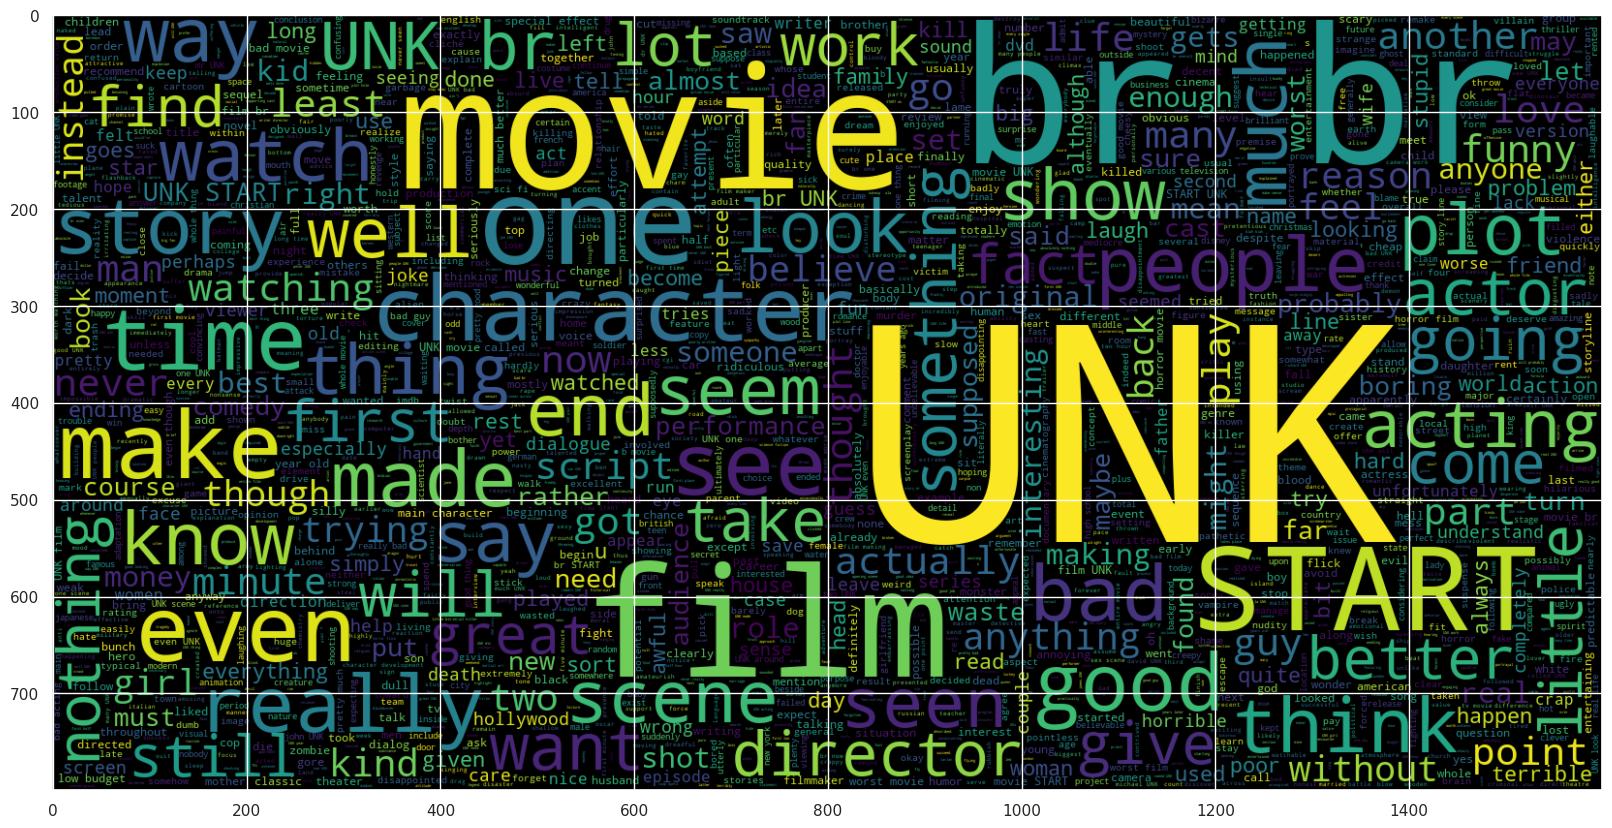

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Sentiment == 0].Reviews))
plt.imshow(wc , interpolation = 'bilinear')

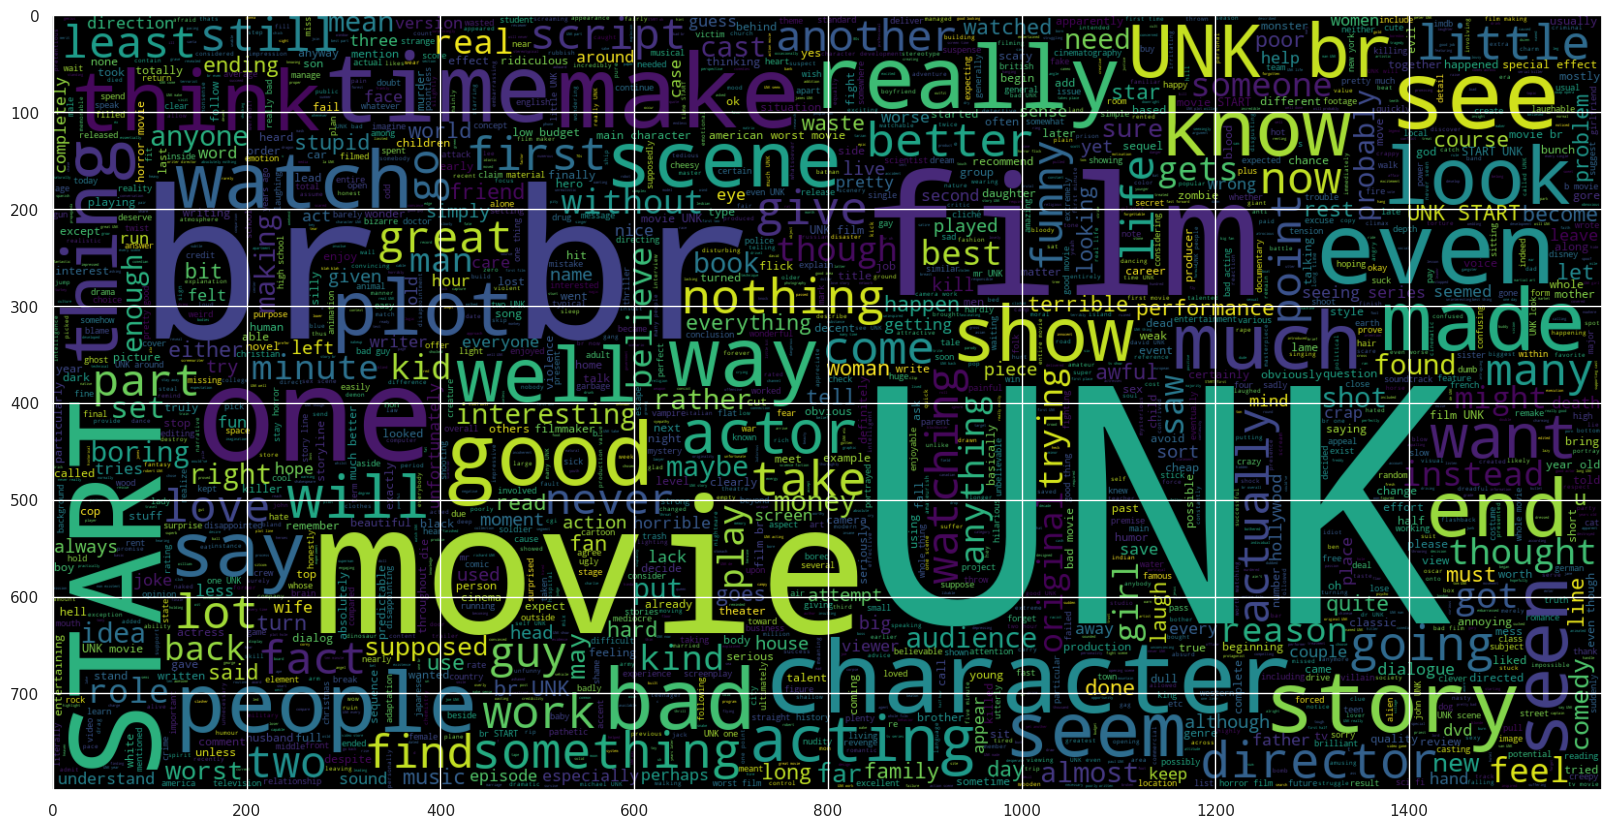

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.Sentiment == 0].Reviews))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

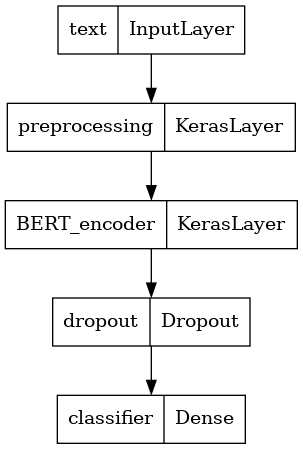

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
epochs = 5
steps_per_epoch = 625 #tf.data.experimental.cardinality(train_data).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
X = data['Reviews']
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(data.review,data.sentiment,random_state = 0 , stratify = data.sentiment)

#valid_size=5000
#X_valid, y_valid = X_train[-valid_size:], y_train[-valid_size:]
#X_test, y_test = X_train[:-valid_size], y_train[:-valid_size]
X_train, X_test, y_train, y_test = train_test_split(data.Reviews,data.Sentiment, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.16, random_state=1) # 0.25 x 0.8 = 0.2
#print('Train Set ->', X_train.shape, y_train.shape)
#print('Validation Set ->', X_valid.shape, y_valid.shape)
#print('Test Set ->', X_test.shape, y_test.shape)

print('Number of reviews in the total set : {}'.format(len(X)))
print('Number of reviews in the training set : {}'.format(len(X_train)))
print('Number of reviews in the validation set : {}'.format(len(X_val)))
print('Number of reviews in the testing set : {}'.format(len(X_test)))

Number of reviews in the total set : 25000
Number of reviews in the training set : 16800
Number of reviews in the validation set : 3200
Number of reviews in the testing set : 5000


In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train, y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
525/525 [==============================] - 107s 188ms/step - loss: 0.5098 - binary_accuracy: 0.7204 - val_loss: 0.4400 - val_binary_accuracy: 0.8275
Epoch 2/5
525/525 [==============================] - 108s 206ms/step - loss: 0.3558 - binary_accuracy: 0.8388 - val_loss: 0.3858 - val_binary_accuracy: 0.8219
Epoch 3/5
525/525 [==============================] - 98s 187ms/step - loss: 0.2729 - binary_accuracy: 0.8832 - val_loss: 0.3997 - val_binary_accuracy: 0.8487
Epoch 4/5
525/525 [==============================] - 98s 187ms/step - loss: 0.2052 - binary_accuracy: 0.9137 - val_loss: 0.4705 - val_binary_accuracy: 0.8378
Epoch 5/5
525/525 [==============================] - 99s 189ms/step - loss: 0.1549 - binary_accuracy: 0.9404 - val_loss: 0.4945 - val_binary_accuracy: 0.8441


In [ ]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

157/157 [==============================] - 17s 106ms/step - loss: 0.4925 - binary_accuracy: 0.8474
Loss: 0.49253028631210327
Accuracy: 0.8474000096321106


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('imdb_reviews.csv')

In [ ]:
data['Sentiment'] = data['Sentiment'].apply(lambda x: 1 if x=='positive' else 0)
data['Reviews'] = data['Reviews'].apply(lambda x: x[7:])

In [ ]:
all_reviews, all_sentiment = list(data['Reviews']), list(data['Sentiment'])

In [ ]:
def merge():
    merged_list = [(all_reviews[i], all_sentiment[i]) for i in range(len(all_reviews))]
    return merged_list

In [ ]:
data = merge()

In [ ]:
train_data = data[:20000]
test_data = data[20000:]

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = TFRobertaForSequenceClassification.from_pretrained('roberta-base')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_texts = [text for text, label in train_data]
train_labels = np.array([label for text, label in train_data])

# Tokenize the training data
train_tokens = tokenizer(train_texts, padding=True, truncation=True, return_tensors='tf')

# Convert the train_tokens dictionary to a tuple of arrays
train_inputs = (train_tokens['input_ids'], train_tokens['attention_mask'])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


In [ ]:
model.fit(
    x=train_inputs,
    y=train_labels,
    epochs=3,
    batch_size=10,
)

Epoch 1/3
2000/2000 [==============================] - 1426s 693ms/step - loss: 0.2471 - sparse_categorical_accuracy: 0.9046
Epoch 2/3
2000/2000 [==============================] - 1369s 684ms/step - loss: 0.1611 - sparse_categorical_accuracy: 0.9399
Epoch 3/3
2000/2000 [==============================] - 1368s 684ms/step - loss: 0.1111 - sparse_categorical_accuracy: 0.9616


In [ ]:
test_tokens = tokenizer(
    [text for text, label in test_data],
    padding=True,
    truncation=True,
    return_tensors='tf'
)

In [ ]:
test_inputs = (test_tokens['input_ids'], test_tokens['attention_mask'])

In [ ]:
output = model.predict(test_inputs)

157/157 [==============================] - 111s 676ms/step


In [ ]:
true_labels = [label for text, label in test_data]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predicted_classes = tf.argmax(output.logits, axis=1)

In [ ]:
report = classification_report(
    true_labels, 
    predicted_classes.numpy(), 
    target_names=['negative', 'positive']
)

In [ ]:
print(report)

              precision    recall  f1-score   support

    negative       0.93      0.94      0.93      2531
    positive       0.94      0.93      0.93      2469

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
import numpy as np
train_texts = [text for text, label in train_data]
train_labels = np.array([label for text, label in train_data])
train_tokens = tokenizer(train_texts, padding=True, truncation=True, return_tensors='tf')


In [ ]:
train_inputs = (train_tokens['input_ids'], train_tokens['attention_mask'])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
model.fit(x=train_inputs, y=train_labels, epochs=3, batch_size=10)

Epoch 1/3
2000/2000 [==============================] - 703s 341ms/step - loss: 0.2891 - sparse_categorical_accuracy: 0.8758
Epoch 2/3
2000/2000 [==============================] - 678s 339ms/step - loss: 0.1454 - sparse_categorical_accuracy: 0.9454
Epoch 3/3
2000/2000 [==============================] - 676s 338ms/step - loss: 0.0731 - sparse_categorical_accuracy: 0.9744


In [ ]:
test_tokens = tokenizer(
    [text for text, label in test_data],
    padding=True,
    truncation=True,
    return_tensors='tf'
)

In [ ]:
test_inputs = (test_tokens['input_ids'], test_tokens['attention_mask'])

In [ ]:
output = model.predict(test_inputs)

157/157 [==============================] - 52s 323ms/step


In [ ]:
true_labels = [label for text, label in test_data]

In [ ]:
predicted_classes = tf.argmax(output.logits, axis=1)

In [ ]:
report = classification_report(
    true_labels, 
    predicted_classes.numpy(), 
    target_names=['negative', 'positive']
)

In [ ]:
print(report)

              precision    recall  f1-score   support

    negative       0.90      0.93      0.92      2531
    positive       0.93      0.89      0.91      2469

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000

